#### Project 1 Addition of Two Numbers End-To-End Machine Learning Project

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

In [3]:
# 1. import pandas as pd

data = pd.read_csv('add.csv')
data.head()

,X,Y,Sum
0,1,1,2
1,2,2,4
2,3,3,6
3,4,4,8
4,5,5,10


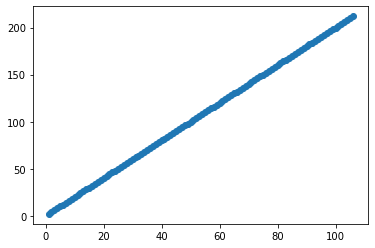

In [8]:
#2. import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.scatter(data['X'],data['Sum'])


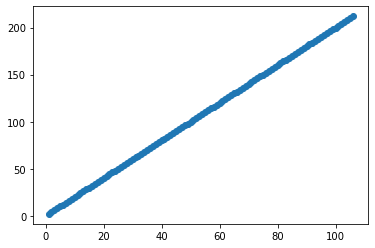

In [9]:
plt.scatter(data['Y'],data['Sum'])

In [10]:
#3. Store Feature Matrix In X And Response (Target) In Vector y

X = data[['X','Y']]
y = data['Sum']

4. Train/Test split

1. Split data into two part : a training set and a testing set
2. Train the model(s) on training set
3. Test the Model(s) on Testing set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42)


In [12]:
# 5. Import & Training the model

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
# 6. Model Training

lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [14]:
# 7. Prediction on Test Data

y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [15]:
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [16]:
df1

,Actual,Lr,svm,rf,gr
100,202,202.0,132.411825,201.28,199.986748
10,22,22.0,80.966248,19.38,20.104694
4,10,10.0,84.634047,8.74,8.013246
81,164,164.0,136.697991,166.34,165.974475
97,196,196.0,134.102596,194.88,194.085819
65,132,132.0,124.561438,131.76,133.999356
30,62,62.0,80.538689,60.88,60.173254
33,68,68.0,82.602161,66.94,66.002399
93,188,188.0,135.889736,186.96,185.994404
11,24,24.0,80.459716,22.00,20.104694


In [17]:
# 8. Compare Performance Visually

import matplotlib.pyplot as plt

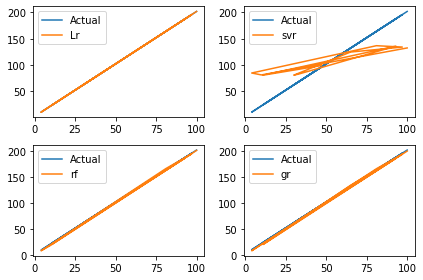

In [18]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [19]:
# 9. Check the model’s prediction performance.

lr.score(X_train,y_train)
lr.score(X_test,y_test)

1.0

In [21]:
# 10. Comparing the results

y_pred  = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
100,202,202.0
10,22,22.0
4,10,10.0
81,164,164.0
97,196,196.0
65,132,132.0
30,62,62.0
33,68,68.0
93,188,188.0
11,24,24.0


In [23]:
# 11. Prediction  
lr.predict([[10,20]])



array([30.])

In [24]:
lr.predict([[12.3,789]])

array([801.3])

In [30]:
# 12. Save Model Usign Joblib

import joblib
joblib.dump(lr,'model_joblib')
model = joblib.load('model_joblib')




In [29]:
model.predict([[10000.2,40000.4]])

array([50000.6])

#### GUI

In [26]:
import joblib

In [27]:
from tkinter import *

In [31]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    
  
    model = joblib.load('model_joblib')
    result= model.predict([[p1,p2]])
    
    Label(master,text = "Addition").grid(row=7)
    Label(master,text=result).grid(row=8)


# Create the main window
master = Tk()

# Your existing code here
master.title("Addition of Numbers Prediction")

label = Label(master, text="Addition of Two Numbers", bg="black", fg="white").grid(row=0, columnspan=2)

Label(master,text = "Enter the First Number").grid(row=1)
Label(master,text = "Enter the Second Number").grid(row=2)


# Entry Box 
e1 = Entry(master)
e2 = Entry(master)

# setting the position for Entry

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)


# Create a predict button
Button(master, text="Predict", command=show_entry).grid(row=10, columnspan=2)


mainloop()